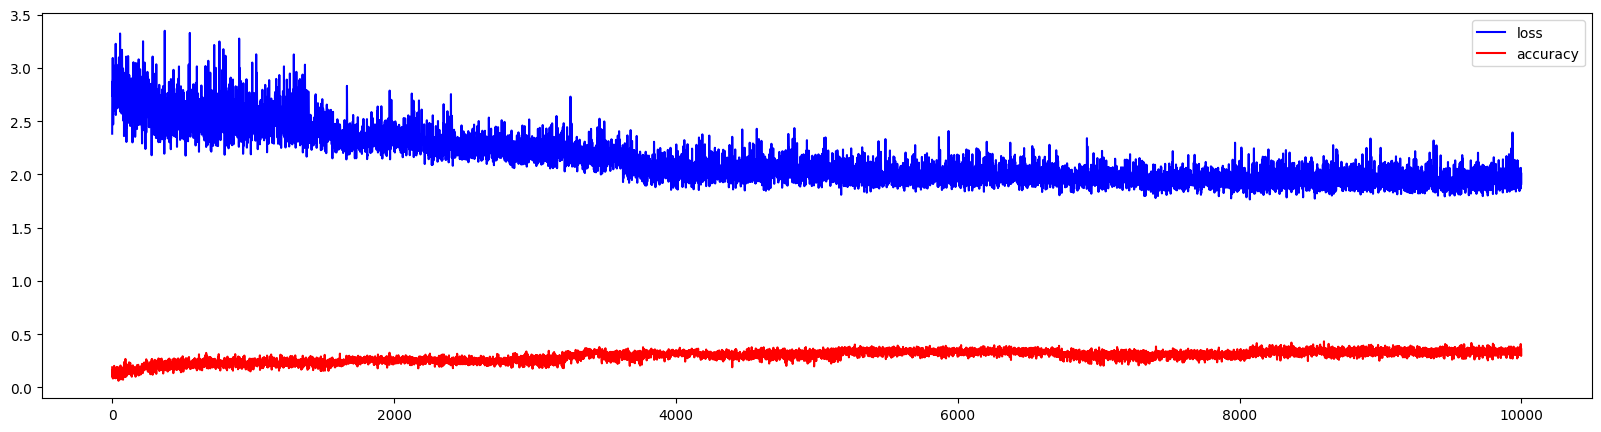

In [23]:
from mnist import MNIST
import random
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data, vertical_data

nnfs.init()

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases
  
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Sigm:
  def forward(self, inputs):
    self.output = 1 / (1 + np.exp(-inputs))

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
    probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
    self.output = probabilities

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods


mndata = MNIST('./')

X, y = mndata.load_training()

steps = []
losses = []
accuracies = []

lowest_loss = 10

X = np.array(X[::100])
y = np.array(y[::100])

inp_size = len(X[0])
n_classes = 10
layer_neurons = 10

dense1 = Layer_Dense(n_inputs = inp_size, n_neurons = layer_neurons)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(n_inputs = layer_neurons, n_neurons = n_classes)
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()

for i in range(10000):
  dense1.weights += 0.01 * np.random.randn(inp_size, layer_neurons)
  dense1.biases += 0.01 * np.random.randn(1, layer_neurons)
  
  dense2.weights += 0.01 * np.random.randn(layer_neurons, n_classes)
  dense2.biases += 0.01 * np.random.randn(1, n_classes)

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  loss = loss_function.calculate(activation2.output, y)

  predictions = np.argmax(activation2.output, axis = 1)
  accuracy = np.mean(predictions == y)

  steps.append(i)
  losses.append(loss)
  accuracies.append(accuracy)

  if loss < lowest_loss:
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

plt.figure(figsize=(20, 5))
plt.plot(steps, losses, color = 'b')
plt.plot(steps, accuracies, color = 'r')
plt.legend(["loss", "accuracy"])
plt.show()

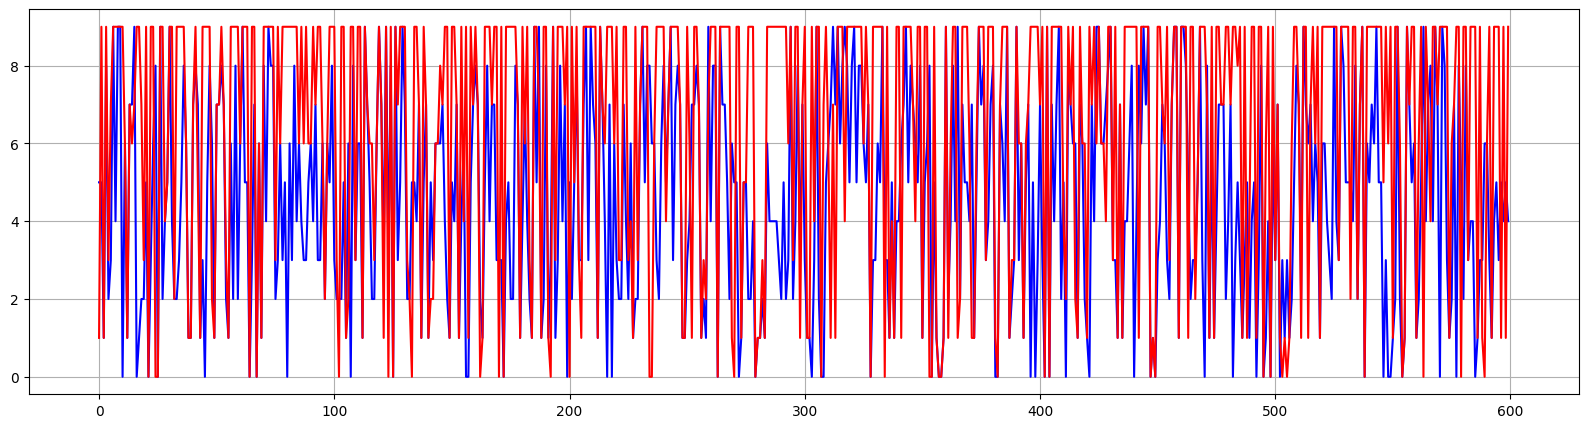

In [22]:
plt.figure(figsize=(20, 5))

plt.plot(np.arange(0, 600, 1), y, color = 'b')
plt.plot(np.arange(0, 600, 1), predictions, color = 'r')

plt.grid(True)
plt.show()